In [639]:
import numpy as np
from matplotlib.pyplot import imshow, figure
from matplotlib.pyplot import plot
from matplotlib.pyplot import show

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})


np.seterr(under='warn')
np.seterr()

{'divide': 'raise', 'over': 'raise', 'under': 'warn', 'invalid': 'raise'}

In [2]:
def conv(kernel, img):
    size = kernel.shape[0]
    
    pixel = lambda local, kernel: (local * kernel).sum()
    get_local = lambda image, i, j: image[i:i+size, j:j+size]
    
    result = np.zeros_like(img)[size-1:, size-1:]
    for i in range(0, result.shape[0]):
        for j in range(0, result.shape[1]):
            p =  pixel(get_local(img, i, j), kernel)
            result[i,j] = p
    return result

def dot(M, x):
    return M @ x

In [3]:
def sqr(v):
    s = int(np.sqrt(v.shape[0] * v.shape[1]))
    return v.reshape((s,s))

def vec(m):
    return m.reshape(-1,1)

# this part is perhaps easier to understand 
# if you derive it yourself rather than read my solution
def fst_non_zero(x):
    assert x.shape[1] == 1
    j = 0
    for row in x:
        if row[0] != 0:
            return j
        j +=1
        
def row(x, summ):
    r =  np.zeros((1, x.shape[0]))
    j = fst_non_zero(x)
    r[0][j] = summ / x[j]
    return r

In [626]:
# matrix for a dot product equivalent to convlution with input imput sq(x) and output sq(y)
def matrix(x, y):
    return np.array([row(x,yy)[0] for yy in y])
# the other way around
def kernel(x, y):
    s = sqr(x)
    z = sqr(y)
    lambdas = []
    for i in range(2):
        for j in range(2):
            lambdas.append(get_local(s, i, j).reshape(1,-1)[0])
    lambdas = np.array(lambdas)
    K = sqr(np.linalg.lstsq(lambdas, y ,rcond=None)[0])
    return K

# DATA

In [664]:
x = np.random.uniform(-1, 1, (3,3))
#imshow(x)

i = lambda: vr #np.random.uniform(-1, 1,  (3,3))

def i():
    if np.random.uniform(-1,1,(1,1)) > 0:
        return vr
    else:
        return vr.T
i()

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [648]:
i()

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [300]:
# output is something like
# "has more vertical stripes or horizontal?"

def o(inpt):
    
    h = np.array([[1],[0]])
    v = np.array([[0],[1]])
    
    ver = np.array([[1,-1], 
                    [1,-1]])
    hor = ver.T
    
    if np.abs(conv(hor, inpt)).sum() == np.abs(conv(ver, inpt)).sum():
        print("BAD")

    if abs(conv(hor, inpt).sum()) > abs(conv(ver, inpt).sum()):
        return h
    else:
        return v

In [462]:
data = [(inpt := i(), o(inpt)) for _ in range(4096)] 

BAD
BAD
BAD


array([[0],
       [1]])

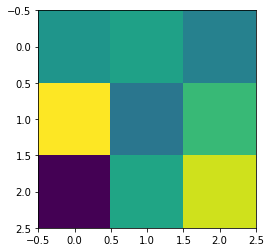

In [378]:
x = np.random.uniform(-1, 1, (3,3))
imshow(x)
o(x)

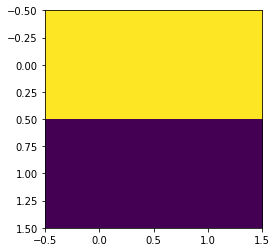

In [352]:
imshow(ver)

[[1]
 [0]]


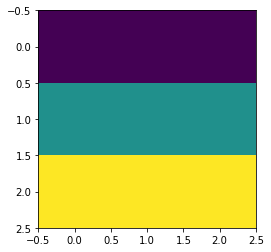

In [646]:
vr  = np.array([[1, 2, 3], 
                [1, 2, 3],
                [1, 2, 3]]).T
print(o(vr))
imshow(vr)

# FORWARD PASS

In [465]:
kernels = np.array([np.random.uniform(0,1,(2,2))]*2)


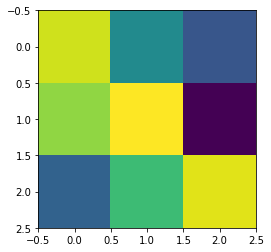

In [61]:
x = data[0][0]
imshow(x)

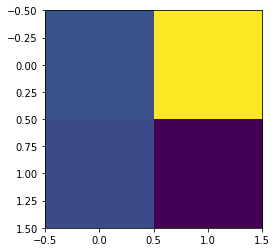

In [62]:
imshow(conv(kernels[0], x))

In [63]:
[vec(conv(k, x)) for k in kernels]

[array([[-0.74],
        [1.39],
        [-0.82],
        [-1.46]]),
 array([[-0.74],
        [1.39],
        [-0.82],
        [-1.46]])]

In [13]:
c = np.concatenate([vec(conv(k, x)) for k in kernels])

In [381]:
W = np.random.uniform(-1,1, (2, 8))

In [67]:
l = W@c
l

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 8)

In [523]:
def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

def m(m, n):
    matrix = np.random.uniform(-1, 1, size=(m,n))
    return matrix / np.sqrt(m*n)

relu = lambda x: np.maximum(x, 0.)


#layer 2 activation
def matrix_softmax(m):
    return np.apply_along_axis(softmax, 0, m)

In [17]:
pred = softmax(l)

In [18]:
pred

array([[0.03],
       [0.97]])

In [19]:
!pwd

/home/const/go/src/website/numpy_mnist/solving_MNIST


In [ ]:
def dconv_dk(x, k):
    
    y = vec(conv(k, sqr(x)))
    
    m = matrix(x, y)
    #l = m @ x
    
    dl_dx = m


    return kernel(x, l)

In [92]:
def grads(train, labels, W0, W1, b0, b1):

    x0 = train
    x1 = W0 @ x0 + b0
    l1 = relu(x1)
    x2 = W1 @ l1 + b1
    l2 = matrix_softmax(x2[0])

    dloss_dx2 = (l2 - labels).T
    dx2_dl1 = W1
    dx1_dW0 = x0[0]
    dx2_dW1 = (l1[0].T)
 
    dloss_dW0 = ((dloss_dx2 @ dx2_dl1) * ((l1[0]>0) + 0.).T ).T @ dx1_dW0.T
    dloss_dW1 = dloss_dx2.T @ dx2_dW1
    dloss_db0 = ((dloss_dx2 @ dx2_dl1 * (l1[0]>0).T  )).sum(axis=0).reshape(-1,1)
    dloss_db1 = (dloss_dx2.T).sum(axis=1).reshape(-1,1)
    
    return (dloss_dW0, dloss_dW1, dloss_db0, dloss_db1)

In [93]:
def convlayer(kenrels, x):
    return np.concatenate([vec(conv(k, x)) for k in kernels])

In [505]:
# "easy" means they are from fully connected layers
# and not from conv layers
def easy_grads(x, y_hat, W, b):

    c = [vec(conv(k, x)) for k in kernels]
    x1 = np.concatenate(c)
    l1 = relu(x1)
    
    x2 = W @ l1 + b
    l2 = softmax(x2)
     

    dloss_dx2 = l2 - y_hat
    dx2_dl1 = W
    dx2_dW  = l1.T
 
    dloss_dW = dloss_dx2 @ dx2_dW
    dloss_db = dloss_dx2.sum(axis=1).reshape(-1,1)
    
    return dloss_dx2, dx2_dl1, dloss_dW,  dloss_db

In [665]:
pixel = lambda local, kernel: (local * kernel).sum()
get_local = lambda image, i, j: image[i:i+2, j:j+2]

data = [(inpt := i(), o(inpt)) for _ in range(2000)] 

W = m(2, 8)
b = m(2, 1)


lr = 0.01
for pair in data:
    
    x, y = pair
    dloss_dx2, dx2_dl1, dloss_dW, dloss_db = easy_grads(x, y, W, b)

    
    
    c = [vec(conv(k, x)) for k in kernels]
    x1 = np.concatenate(c)
    m0 = matrix(vec(x), c[0])
    m1 = matrix(vec(x), c[1])

    
    
    dl1_dx1 = (x1>0.) + 0.
    dx1_dm0 = np.concatenate([vec(x)]*4, axis=1).T
    dx1_dm1 = np.concatenate([vec(x)]*4, axis=1).T
    dloss_dm0 = (dloss_dx2.T @ (dx2_dl1 @ dl1_dx1)) * dx1_dm0
    dloss_dm1 = (dloss_dx2.T @ (dx2_dl1 @ dl1_dx1)) * dx1_dm1
    m0 = m0 - dloss_dm0 * lr
    m1 = m1 - dloss_dm1 * lr

    kernels = [kernel(x, (m0 @ vec(x))), kernel(x, (m1 @ vec(x)))]
    W = W - dloss_dW * lr
    b = b - dloss_db * lr

<ipython-input-523-a6aa9fd09820>:2: RuntimeWarning: underflow encountered in exp
  exps = np.exp(x - np.max(x))


In [628]:
print(dloss_dx2.T.shape, dx2_dl1.shape, dl1_dx1.shape, dx1_dm0.shape)

(1, 2) (2, 8) (8, 1) (4, 9)


In [518]:
x

array([[0.37, 0.29, 0.53],
       [-0.97, -0.67, -0.42],
       [0.09, -0.35, 0.36]])

In [667]:
err = 0
data = [(inpt := i(), o(inpt)) for _ in range(2000)] 

for pair in data:
    x = pair[0]
    c = [vec(conv(k, x)) for k in kernels]
    x1 = np.concatenate(c)
    l1 = relu(x1)
    
    x2 = W @ l1 + b
    l2 = softmax(x2)
    if np.argmax(l2) == np.argmax(pair[1]):
        pass
    else:
        err+=1
err

<ipython-input-523-a6aa9fd09820>:2: RuntimeWarning: underflow encountered in exp
  exps = np.exp(x - np.max(x))


0

In [488]:
a = np.array([1,2,-1,-2,1])

In [494]:
def relu_prime(a):
    b = np.copy(a)
    b[b<=0]=0
    b[b>0]=1
    return b


In [504]:
((a>0.0) + 0.0)

array([1.00, 1.00, 0.00, 0.00, 1.00])

In [585]:
m0.shape

(4, 9)

In [538]:
x1.shape

(8, 1)

In [541]:
m0 - x1.T

array([[0.96, -0.28, 1.18, 0.84, -0.04, -0.28, 1.18, 0.84],
       [6.85, -0.28, 1.18, 0.84, -0.04, -0.28, 1.18, 0.84],
       [-29.69, -0.28, 1.18, 0.84, -0.04, -0.28, 1.18, 0.84],
       [-21.08, -0.28, 1.18, 0.84, -0.04, -0.28, 1.18, 0.84]])

In [542]:
m0 - np.concatenate([x1.T]*4)

array([[0.96, -0.28, 1.18, 0.84, -0.04, -0.28, 1.18, 0.84],
       [6.85, -0.28, 1.18, 0.84, -0.04, -0.28, 1.18, 0.84],
       [-29.69, -0.28, 1.18, 0.84, -0.04, -0.28, 1.18, 0.84],
       [-21.08, -0.28, 1.18, 0.84, -0.04, -0.28, 1.18, 0.84]])

In [544]:
np.concatenate([x1.T]*4).shape

(4, 8)

In [606]:
vec((m0 @ vec(x)))

array([[0.04],
       [0.27],
       [-1.18],
       [-0.84]])

In [625]:
kernel(vec(x), vec(m0 @ vec(x)))

<ipython-input-621-28efe9bd47ac>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  lambdas = np.array(lambdas)


LinAlgError: 1-dimensional array given. Array must be two-dimensional

In [607]:
x

array([[0.37, 0.29, 0.53],
       [-0.97, -0.67, -0.42],
       [0.09, -0.35, 0.36]])

In [608]:
m0 @ vec(x)

array([[0.04],
       [0.27],
       [-1.18],
       [-0.84]])

In [565]:
vec(x).shape

(9, 1)

In [571]:
m0.shape

(4, 9)